Problem: Analyzing Student metrics as a predictor of their perfomance index and being able to predict students performance based on these factors


*Data Description*

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

*Variables:*

**Hours Studied:** The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous tests.

**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).

**Sleep Hours**: The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced**: The number of sample question papers the student practiced.


*Target Variable:*

**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

source:https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [29]:
student = pd.read_csv('/content/sample_data/Student_Performance.csv')

In [30]:
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [31]:
#Exploring the Student Data

In [32]:
student.info()
student.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [33]:
student['Extracurricular Activities'] = np.where(student['Extracurricular Activities']== 'Yes', 1,0)

In [34]:
studentCorr = student.corr()
studentCorr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


In [35]:
sum(student.duplicated())

127

In [36]:
student.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [37]:
display(student[student.duplicated(keep = False)].sort_values(by = list(student.columns)).head(10))

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6975,1,41,0,7,3,12.0
9966,1,41,0,7,3,12.0
2225,1,42,1,9,7,17.0
4986,1,42,1,9,7,17.0
2647,1,57,0,8,0,31.0
8522,1,57,0,8,0,31.0
3398,1,63,1,8,3,37.0
8184,1,63,1,8,3,37.0
4573,1,66,0,8,2,40.0
5578,1,66,0,8,2,40.0


In [63]:
student.duplicated().sum()

np.int64(127)

In [38]:
#lets keep the duplicates for now to see the effects on model training

In [39]:
#creating individual histograms for each numerical
#attribute to visualize their distributions separately.

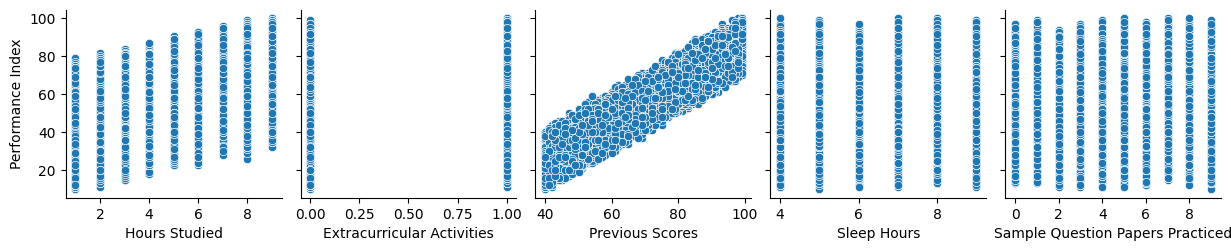

In [40]:
sns.pairplot(student, x_vars= ['Hours Studied', 'Extracurricular Activities','Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'], y_vars= ["Performance Index"])

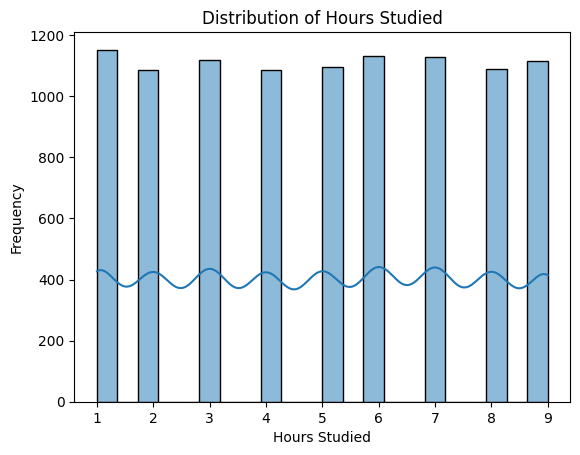

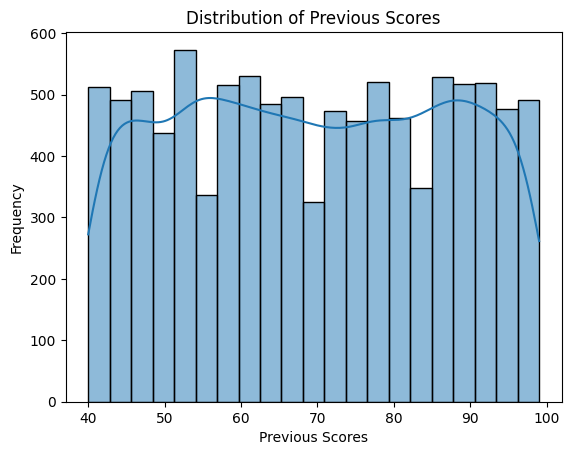

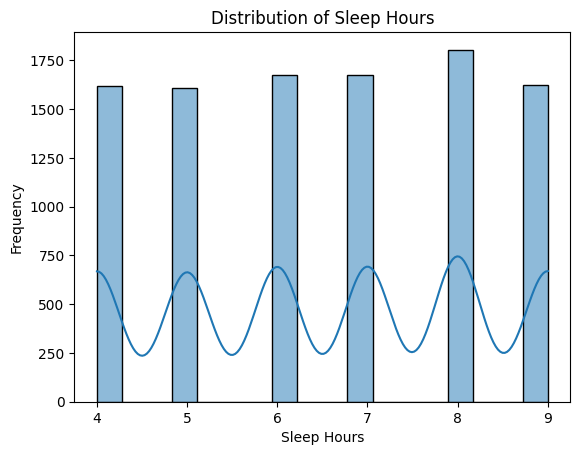

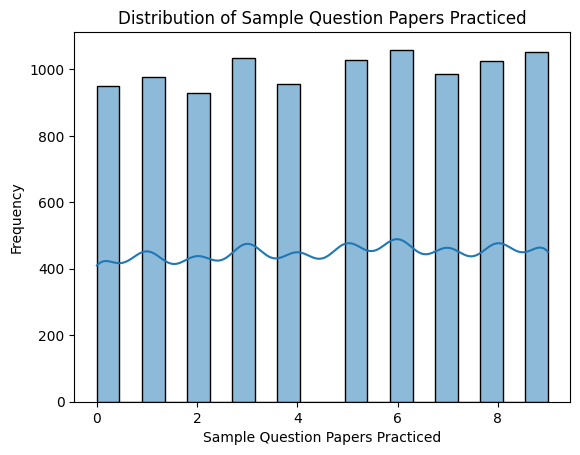

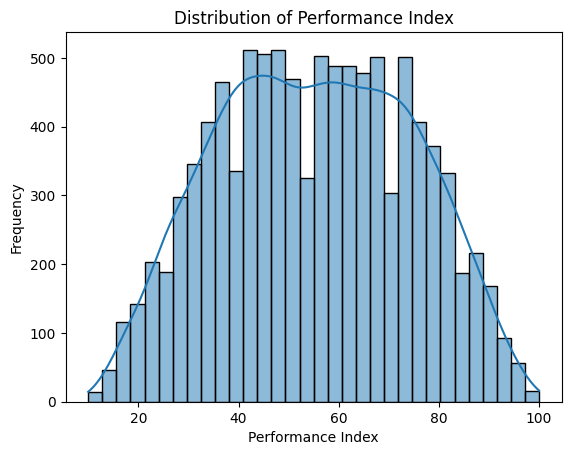

In [41]:
numerical_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

for col in numerical_cols:

    sns.histplot(student[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [42]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
x_vars = student[['Hours Studied', 'Previous Scores', 'Extracurricular Activities','Sleep Hours', 'Sample Question Papers Practiced']]
y_vars = student["Performance Index"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_vars, y_vars, test_size=0.3, random_state=42)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7000, 5), (3000, 5), (7000,), (3000,))

In [45]:
#Creating and training the Model

In [46]:
#Using the linear regression model
from sklearn.linear_model import LinearRegression
linereg_model = LinearRegression()  #instantiate model
linereg_model.fit(x_train, y_train) #train and fit model
y_pred = linereg_model.predict(x_test) #making predictions

#Displaying the predictions
prediction_df = pd.DataFrame({ 'Actual': y_test, 'Predicted': y_pred})
prediction_df



,Actual,Predicted
6252,51.0,54.747286
4684,20.0,22.618844
1731,46.0,47.936651
4742,28.0,31.340099
4521,41.0,43.059743
...,...,...
8014,32.0,31.819775
1074,40.0,37.503045
3063,33.0,33.424518
6487,69.0,67.925790


Text(0, 0.5, 'Actual')

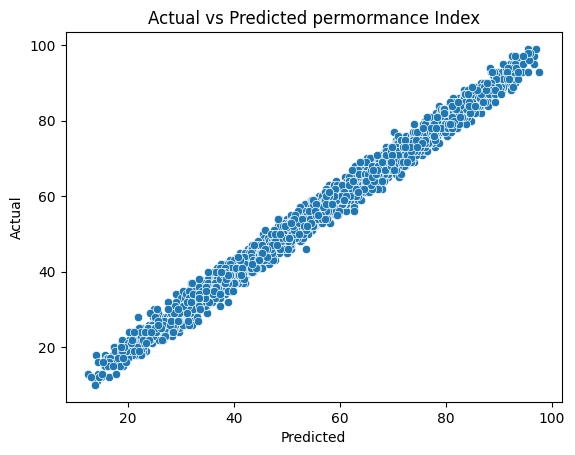

In [47]:
sns.scatterplot( x= y_pred, y = y_test)
plt.title ('Actual vs Predicted permormance Index')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [48]:
#compute the RMSE of the predictions
from sklearn import metrics
print( 'Mean Average Error: ', metrics.mean_absolute_error(y_test, y_pred))
print( 'Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print( 'Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean: ', y_test.mean())

Mean Average Error:  1.6090437564045217
Mean Squared Error:  4.066563824092682
Root Mean Squared Error:  2.0165722957763457
Mean:  54.81666666666667


In [49]:
training_accuracy = linereg_model.score(x_test, y_test)
training_accuracy * 100

98.90110607021137

In [50]:
#USING A RANDOM FOROEST MODEL

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_pred = rf_model.predict(x_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results


,Actual,Predicted
6252,51.0,55.865000
4684,20.0,21.490000
1731,46.0,46.660000
4742,28.0,28.630000
4521,41.0,41.907000
...,...,...
8014,32.0,30.373667
1074,40.0,38.360000
3063,33.0,32.510000
6487,69.0,67.214167


In [52]:
#checking errors
print('Mean Average Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean: ', y_test.mean())

Mean Average Error: 1.8248509589947088
Mean Squared Error: 5.216646864828772
Root Mean Squared Error: 2.2839980001805547
Mean:  54.81666666666667


In [53]:
rf_accuracy = rf_model.score(x_test, y_test) * 100
rf_accuracy

98.59032297989562

In [57]:
#Using a Lasso (L1 regularised) regression model
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=50, max_iter=10, tol = 0.1)
lasso_model.fit(x_train, y_train)

Lasso(alpha=50, max_iter=10, tol=0.1)

In [58]:
#predictions = lasso_model.predict(x_test)
lasso_model.score(x_test, y_test) * 100


81.76862665775393

In [62]:
#Seeing how the model perfors without duplicates
unique_students = student.drop_duplicates(inplace = False)
unique_students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   int64  
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 539.9 KB


In [68]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_vars, y_vars, test_size=0.3, random_state=42)

In [71]:
linear_model2 = LinearRegression()
linear_model2.fit(x_train2, y_train2)
linear_model2.predict(x_test2)


array([54.74728554, 22.61884434, 47.93665124, ..., 33.42451751,
       67.92578967, 31.20587077])

In [72]:
linear_model2.score(x_test2, y_test2) * 100

98.90110607021137

 **In conclusion: The linear regression model seems to perform best out of all three models (linear regression, random forest and Lasso) to a predict performance index based on certain student features with an accuracy of 98.8% with the orignal dataset and 98.9% when the model is used on the data set with completely unique entries (duplicated removed) **

